In [1]:
# Importing the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/kueyram/DSC540/main/List%20of%20countries%20by%20GDP%20(nominal)%20-%20Wikipedia.htm'

In [3]:
# Send a get request to the url
response = requests.get(url)

In [4]:
# Read the page using bs4
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
# Find the table structure you will need to deal with (how many tables there are?)
tables = soup.find_all("table")

# Number of tables
num_tables = len(tables)
print('The number of tables is ', num_tables)

The number of tables is  9


In [6]:
# Find the right table using bs4
gdp_tables = soup.find("table", {"class": '"wikitable"|}'})

In [7]:
# print (gdp_table.contents)

In [8]:
# Separate the source names with their corresponding data
# Let's find the first row in the table
sources_row = gdp_tables.tbody.find_all('tr', recursive=False)[0]

# Let's extract all td elements from the 1st row
sources_list = [td for td in sources_row.find_all('td')]

# Number of sources:
num_sources = len(sources_list)

# Print the result
print('The number of sources is ', num_sources)

The number of sources is  3


In [9]:
# Data

# Finding the tbody section in gdp_tables
tbody_gdp = gdp_tables.find('tbody')

# Finding all tr elements in the tbody
rows_gdp = tbody_gdp.find_all('tr', recursive=False)

# Finding the td elements in the second row
data_cells = rows_gdp[1].find_all('td', recursive=False)

print(len(data_cells))


3


In [10]:
# Get the sources names from the list of sources
# Let's initialize an empty list to store sources
sources = []
# Let's iterate through each elements in the sources list
for source in sources_list:
    # Let's find all a tag in the current source element
    a_tags = source.findAll('a')
    if a_tags:  # Checking if a tags are found
        sources.append(a_tags[0].getText())  # Get text from the first a tag and add it to sources

# Print the source names
print(sources)

['International Monetary Fund', 'World Bank', 'United Nations']


In [11]:
# Let's extract the header of the 1st table
# Get the 1st element of the data_cells
table_imf = data_cells[0]

# Let's find all the th tags within the 1st cell
th_tags = table_imf.find_all('th')

# Extracting the text and removing whitespace for each th tag
header_imf = [th.getText().strip() for th in th_tags]

# Printing the results
print('The header of the 1st table is ', header_imf)

The header of the 1st table is  ['Rank', 'Country', 'GDP(US$MM)']


In [12]:
# Creating a dataframe

# Finding the tbody element within the first table
tbody_table_imf = table_imf.find('tbody')

# Finding all tr elements within the tbody
rows_imf = tbody_table_imf.find_all('tr')

# Extract data from td elements in each tr element
data_rows_imf = []
for tr in rows_imf:
    # Finding all td elements in the current tr element
    td_elements = tr.find_all('td')
    # Extracting text content from td elements and strip whitespace
    imf_row_data = [td.get_text().strip() for td in td_elements]
    # Adding the row data to the data_rows_imf list
    data_rows_imf.append(imf_row_data)

# Creating a dataframe using data_rows_imf and header_imf as columns
df_imf = pd.DataFrame(data_rows_imf, columns=header_imf)

# Display the first 10 rows of the dataframe
df_imf.head(10)

,Rank,Country,GDP(US$MM)
0,,World[19],"79,865,481"
1,1,United States,"19,390,600"
2,2,China[n 1],"12,014,610"
3,3,Japan,"4,872,135"
4,4,Germany,"3,684,816"
5,5,United Kingdom,"2,624,529"
6,6,India,"2,611,012"
7,7,France,"2,583,560"
8,8,Brazil,"2,054,969"
9,9,Italy,"1,937,894"


In [13]:
# Let's extract the header of the 1st table
table_wb = data_cells[1]

# Let's find all the th tags within the 1st cell
th_tags = table_wb.find_all('th')

# Extracting the text and removing whitespace for each th tag

header_wb = [th.getText().strip() for th in th_tags]

# Finding the tbody element within the first table
tbody_table_wb = table_wb.find('tbody')

# Finding all tr elements within the tbody
rows_wb = tbody_table_wb.find_all('tr')

# Extracting data from td elements in each tr element
data_rows_wb = []
for tr in rows_wb[1:]:
    # Finding all td elements in the current tr
    td_elements = tr.find_all('td')
    
    # Extracting text from td elements and removing whitespace
    wb_row_data = [td.get_text().strip() for td in td_elements]
    
    # Getting the numerical value
    numerical_value = wb_row_data[-1].split('♠')[-1]
    
    # Adding the row data to the list
    data_rows_wb.append(wb_row_data[:-1] + [numerical_value])

# Creating a dataframe using data_rows_wb and header_wb as columns
df_wb = pd.DataFrame(data_rows_wb, columns=header_wb)

# Displaying the first 10 rows of the dataframe
df_wb.head(10)

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"
5,5,United Kingdom,"2,622,434"
6,6,India,"2,597,491"
7,7,France,"2,582,501"
8,8,Brazil,"2,055,506"
9,9,Italy,"1,934,798"


In [14]:
# Let's extract the header of the 1st table
table_un = data_cells[1]

# Let's find all the th tags within the 1st cell
th_tags = table_un.find_all('th')

# Extracting the text and remove whitespace for each th tag
header_un = [th.getText().strip() for th in th_tags]

# Finding the tbody element within the first table
tbody_table_un = table_un.find('tbody')

# Finding all tr elements within the tbody
rows_un = tbody_table_un.find_all('tr')

# Extracting data from td elements in each tr element
data_rows_un = []
for tr in rows_un[1:]:
    # Finding all td elements in the current tr
    td_elements = tr.find_all('td')
    
    # Extracting text from td elements and remove whitespace
    un_row_data = [td.get_text().strip() for td in td_elements]
    
    # Getting the numerical value
    numerical_value = un_row_data[-1].split('♠')[-1]
    
    # Add the row data to the list
    data_rows_un.append(un_row_data[:-1] + [numerical_value])

# Creating a dataframe using data_rows_un and header_un as columns
df_un = pd.DataFrame(data_rows_un, columns=header_un)

# Displaying the first 10 rows of the dataframe
df_un.head(10)

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"
5,5,United Kingdom,"2,622,434"
6,6,India,"2,597,491"
7,7,France,"2,582,501"
8,8,Brazil,"2,055,506"
9,9,Italy,"1,934,798"


In [15]:
# Read the visit_data.csv
# Importing the librairies
import pandas as pd
import matplotlib.pyplot as plt

# Link to the datafile
file = 'https://raw.githubusercontent.com/kueyram/DSC540/main/datasets/visit_data.csv'

# Reading the file
visit_data = pd.read_csv(file)

In [16]:
# Columns of the dataset
visit_data.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address',
       'visit'],
      dtype='object')

In [17]:
# Size of the dataset
size_dataset = visit_data.shape
print('The size of the dataset is ', size_dataset)

The size of the dataset is  (1000, 7)


In [18]:
# Printing the first 5 rows of the dataset
visit_data.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [19]:
# Checking for duplicate rows
duplicate_rows = visit_data.duplicated()

# Print the result
if duplicate_rows.any():
    print('There are duplicate rows')
    print(visit_data[duplicate_rows])
else:
    print("There are no duplicate rows")

There are no duplicate rows


In [20]:
# Let's define the essential columns
essential_columns =  ['first_name', 'last_name', 'email', 'gender', 'ip_address', 'visit'] 
# Check for NaN in essential columns
nan_essential = any(visit_data[column].isna().any() for column in essential_columns)

if nan_essential:
    print("There are NaN values in some columns")
    
    # List essential columns with NaN values
    columns_with_nan = [column for column in essential_columns if visit_data[column].isna().any()]
    print("Columns with NaN:", ', '.join(columns_with_nan))
else:
    print("No NaN values found in essential columns")


There are NaN values in some columns
Columns with NaN: first_name, last_name, gender, visit


In [21]:
# Get rid of the outliers
# The essentials columns in this dataset are email, ip_address and visit
# We will remove row with NaN in this essential columns

visit_data_cleaned = visit_data.dropna(subset=['email', 'ip_address', 'visit'])

In [22]:
print('The size of the original dataset is ', size_dataset)
print('The size after removing the rows is NaN is ',visit_data_cleaned.shape )

The size of the original dataset is  (1000, 7)
The size after removing the rows is NaN is  (974, 7)


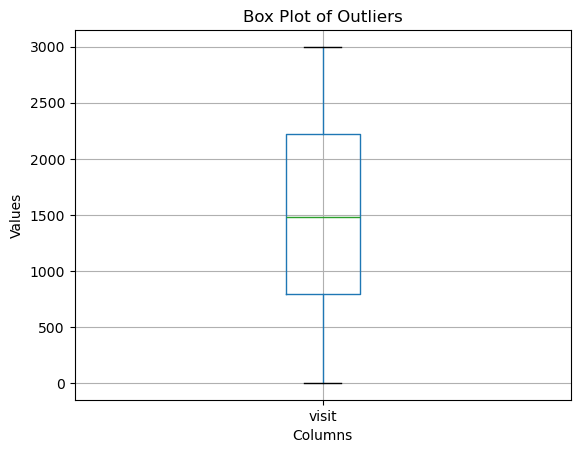

In [23]:
# Create a box plot to check for outliers
columns_to_check = ['email', 'ip_address', 'visit']

# Creating a box plot
visit_data_cleaned[columns_to_check].boxplot()

# Title and labels
plt.title('Box Plot of Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

In [24]:
import pandas as pd
from scipy.stats import zscore


# Let's calculate the z-scores for the 'visit' column
visit_data_cleaned['visit_zscore'] = zscore(visit_data_cleaned['visit'])

# We will use a threshold of 3 to identify outliers
zscore_threshold = 3

# Removing outliers by filtering the DataFrame based on z-scores
visit_data_no_outliers = visit_data_cleaned[abs(visit_data_cleaned['visit_zscore']) <= zscore_threshold]

# Let's now drop the visit_zscore columns
visit_data_no_outliers = visit_data_no_outliers.drop(columns=['visit_zscore'])

# Final size of the dataframe
visit_data_no_outliers.shape

C:\Users\Eyram\AppData\Local\Temp\ipykernel_10784\3982056282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visit_data_cleaned['visit_zscore'] = zscore(visit_data_cleaned['visit'])


(974, 7)

In [25]:
import sqlite3

# Query to create the table 'clients'
query = '''CREATE TABLE IF NOT EXISTS clients (
                    id INTEGER PRIMARY KEY,
                    Name VARCHAR(30),
                    Address VARCHAR(30),
                    City VARCHAR(15),
                    State VARCHAR(2),
                    Zip INTEGER,
                    "Phone Number" VARCHAR(15)
                )'''

# Connect to the SQLite database
con = sqlite3.connect('dsc540week2_3.sqlite')

# Execute the query
con.execute(query)


# Commit changes to the database
con.commit()

# Close the connection
con.close()

In [26]:
# Add at least 10 rows of data and submit your code with a query generating your results.

In [27]:
# Adding data to the table
con = sqlite3.connect('dsc540week2_3.sqlite')

# Query to add the data
data = [("Sheri Saunders","107 Ramirez Junction Suite 462","Wrightburgh","SD","16393","954-606-8173"),
        ("Peggy Sanchez","5524 Eric Oval Suite 912","Arlington","VA","06948","379-538-9775"),
        ("William Garcia","22052 Kelly Lodge Apt. 998","Houston","TX","99499","467-782-7924"),
        ("Dustin Garcia","206 Johnson Coves","New Jenniferside","AR","60448","488-977-2975"),
        ("Kristen Santos","40480 Gibbs Field Suite 762","Baltimore","MD","43194","522-763-4022"),
        ("Erin Garrett","46158 Laurie Circle","Bellevue","NE","68046","559-704-2800"),
        ("Michael Harmon","63071 Emily Trail","Columbia","SC","49034","423-377-1419"),
        ("Mary Larson","109 Scott Haven Suite 229","Des Moines","IA","22238","(494-632-6169"),
        ("Emily Turner","76461 Fisher Isle","Omaha","NE","68127","402-701-9717"),
        ("Sarah Hansen","971 Sara Loaf Apt. 195","West Carol","VA","44347","847-245-9021"),
]

stmt = stmt = "INSERT INTO clients (Name, Address, City, State, Zip, 'Phone Number') VALUES (?, ?, ?, ?, ?, ?)"

# Execute the query
con.executemany(stmt, data)

# Commit the changes
con.commit()

# Close the connection
con.close()

In [28]:
# Query to retrieve the data from the table

# Connect to the SQLite database
con = sqlite3.connect('dsc540week2_3.sqlite')

# Create a cursor object
cursor = con.cursor()

# Query to retrieve the data
query = '''SELECT * FROM clients'''

# Execute the query
cursor.execute(query)

# Fetch all rows from the result
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)


(1, 'Sheri Saunders', '107 Ramirez Junction Suite 462', 'Wrightburgh', 'SD', 16393, '954-606-8173')
(2, 'Peggy Sanchez', '5524 Eric Oval Suite 912', 'Arlington', 'VA', 6948, '379-538-9775')
(3, 'William Garcia', '22052 Kelly Lodge Apt. 998', 'Houston', 'TX', 99499, '467-782-7924')
(4, 'Dustin Garcia', '206 Johnson Coves', 'New Jenniferside', 'AR', 60448, '488-977-2975')
(5, 'Kristen Santos', '40480 Gibbs Field Suite 762', 'Baltimore', 'MD', 43194, '522-763-4022')
(6, 'Erin Garrett', '46158 Laurie Circle', 'Bellevue', 'NE', 68046, '559-704-2800')
(7, 'Michael Harmon', '63071 Emily Trail', 'Columbia', 'SC', 49034, '423-377-1419')
(8, 'Mary Larson', '109 Scott Haven Suite 229', 'Des Moines', 'IA', 22238, '(494-632-6169')
(9, 'Emily Turner', '76461 Fisher Isle', 'Omaha', 'NE', 68127, '402-701-9717')
(10, 'Sarah Hansen', '971 Sara Loaf Apt. 195', 'West Carol', 'VA', 44347, '847-245-9021')
